# Income Group Classification using WHO data


# Context 
DeltaSquare is an NGO that works with Government on matters of social policy to bring about a change in the lives of underprivileged sections of the society. They are tasked with coming up a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

# Objective

1. What are the different factors that influence income of an individual?

2. To build a prediction model that can help government target the right pockets of the society 

# Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

### Load data

In [2]:
who = pd.read_csv("who_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Understand the shape of the dataset.

In [6]:
data.shape

(32561, 15)

* The dataset has 32561 rows and 15 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital gain            32561 non-null  int64 
 11  capital loss            32561 non-null  int64 
 12  working hours per week  32561 non-null  int64 
 13  native-country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

* We see that names of the columns have spaces, dots and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity along column names
* Dependent variable is salary which is of categorical type
* age, capital gain and capital loss are of integer type while other variable are of categorical type
* There are no missing values in the dataset.

In [8]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns =[col.replace(' ','_') for col in data.columns]
data.columns =[col.replace('-','_') for col in data.columns]
data.columns =[col.replace('.','') for col in data.columns]

In [9]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')


* column names are fixed

### Summary of the dataset.

In [10]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


* The average age of people in our dataset is 38.58 years
* The average education in years is 10 years
* The salary is skewed variable. Most of the people earn less than  50K and very few earn above 50K
* Mode of relationship is Husband
* The average working hours per week is 40 hours with standard deviation of 12 hours
* Average capital gain is 1077.64 dollar with standard deviation of 7385 dollar. This indicates that there very high variability in capital gain.
* The average capital loss is 87 dollar with standard deviation of 402 dollar

**Lets us look at different levels in categorical variables**

In [11]:
# filtering object type columns
cat_columns = data.describe(include=['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [12]:
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in workclass are :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Unique values in education are :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
**************************************************
Unique values in marital_status are :
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 

* There are some values represented by a '?' in workclass,occupation and native country columns we should replace it with 'unknown'.
* There are many distinct values in native_country and marital_status that can be reduced to generic levels.

**Replacing '?' with 'unknown'**

In [13]:
data.workclass = data.workclass.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.native_country = data.native_country.apply(lambda x: 'Unknown' if x == ' ?' else x)
data.occupation = data.occupation.apply(lambda x: 'Unknown' if x == ' ?' else x)

### Data Cleaning

* native_country

In [14]:
print(f'There are a {data.native_country.nunique()} distinct countries in the data set, we can reduce them to their respective continents.')

There are a 42 distinct countries in the data set, we can reduce them to their respective continents.


In [15]:
data.native_country = data.native_country.str.replace(' ','') # remove empty spaces from strings

In [16]:
north_america  = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                   "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                   "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                   "United-States"]
asia  = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands",
            "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
            "Yugoslavia"]
other  = ["South", "Unknown","?"]

In [17]:
def region_combining(x):
    if x in north_america:
        return 'north_america'
    elif x in asia:
        return 'asia'
    elif x in south_america:
        return 'south_america'
    elif x in europe:
        return 'europe'
    elif x in other:
        return 'other'
    else:
        return x

In [18]:
data['native_country'] = data['native_country'].apply(region_combining)

In [19]:
print('Distinct values in Native Country column:', data.native_country.nunique())

Distinct values in Native Country column: 5


* marital_status

In [20]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these valuesinto the following groups:
* Married
* Not-Married
* Never-Married


In [21]:
data.marital_status = data.marital_status.str.replace(' ','') # remove empty spaces from strings

married = ['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']
not_married = ['Divorced','Separated','Widowed']

def reduce_marital_status(x):
    if x in married:
        return 'married'
    elif x in not_married:
        return 'not_married'
    else:
        return x

In [22]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [23]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

## Univariate Analysis

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

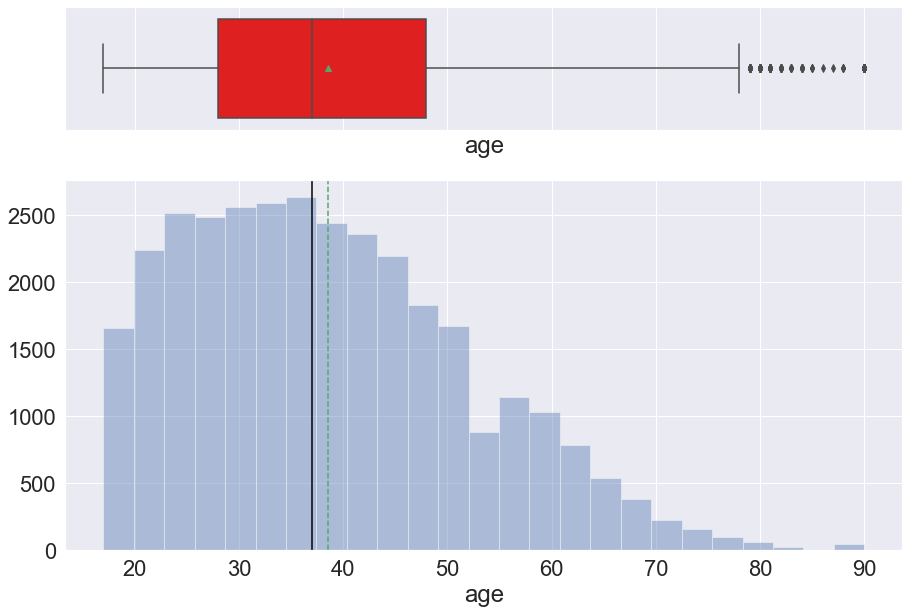

In [25]:
histogram_boxplot(data.age,bins=25);

* The age variable is slightly right skewed and it has some outliers
* The average age of people is around 38 years

### Observations on eductaion_no_of_years

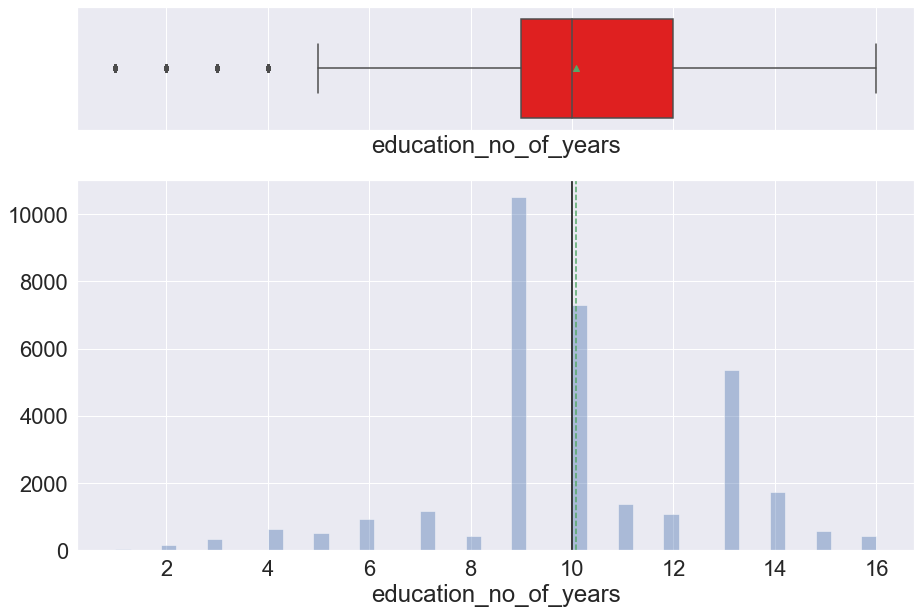

In [26]:
histogram_boxplot(data.education_no_of_years)

* Most of the observations have 9 years of education.
* Mean and median years of education are equal to 10 years.

### Observations on fnlwgt

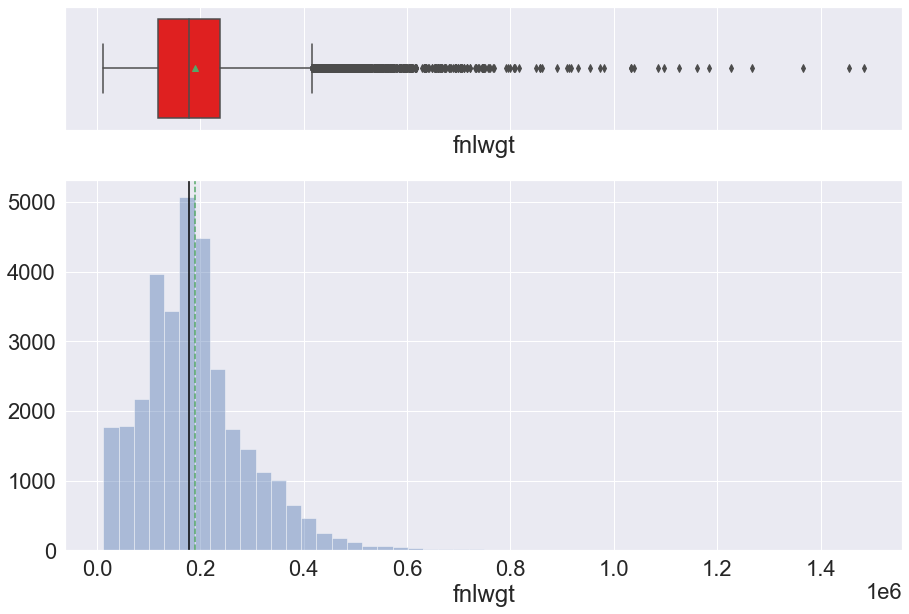

In [27]:
histogram_boxplot(data.fnlwgt)

* fnlwght is right skewed. It has lots of outliers on right side which we will cap. We suspect that this variable will not be significant in predicting salary of person as this number indicates demographic details of population of a region

### Observations on capital_gain

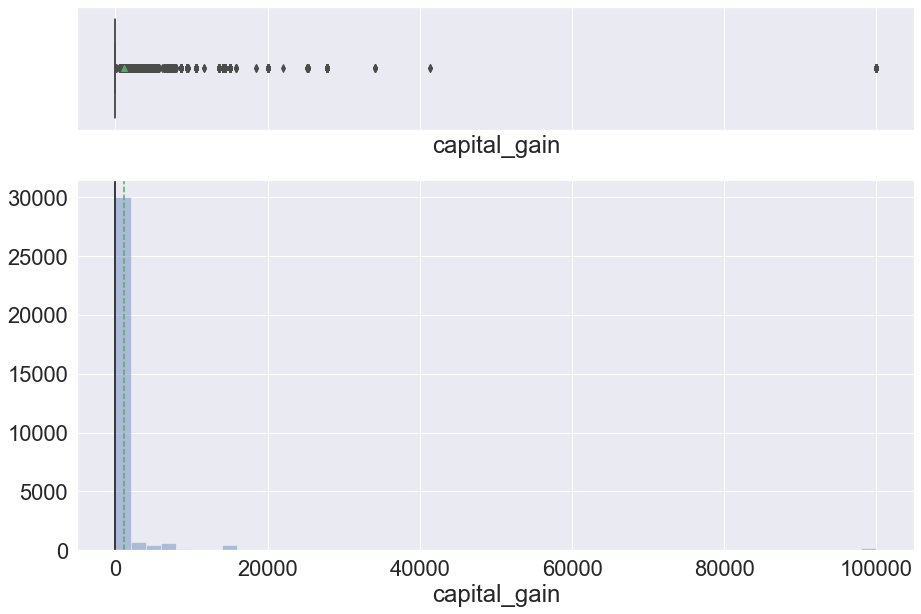

In [28]:
histogram_boxplot(data.capital_gain)

* capital_gain is a continuous variable describing gain from financial investments. Histograms shows that the distributions of this variable is highly skewed.
* Capital gain is right skewed
* Majority of observation have 0 capital_gain but there are some observations where capital gain is higher than 5000 , these are outliers

In [29]:
# Lets look at quantiles of capital gain
data.capital_gain.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1])

0.10        0.0
0.20        0.0
0.30        0.0
0.40        0.0
0.50        0.0
0.60        0.0
0.70        0.0
0.80        0.0
0.90        0.0
0.95     5013.0
0.99    15024.0
1.00    99999.0
Name: capital_gain, dtype: float64

* majority observation have 0 as capital gain

### Observations on capital_loss

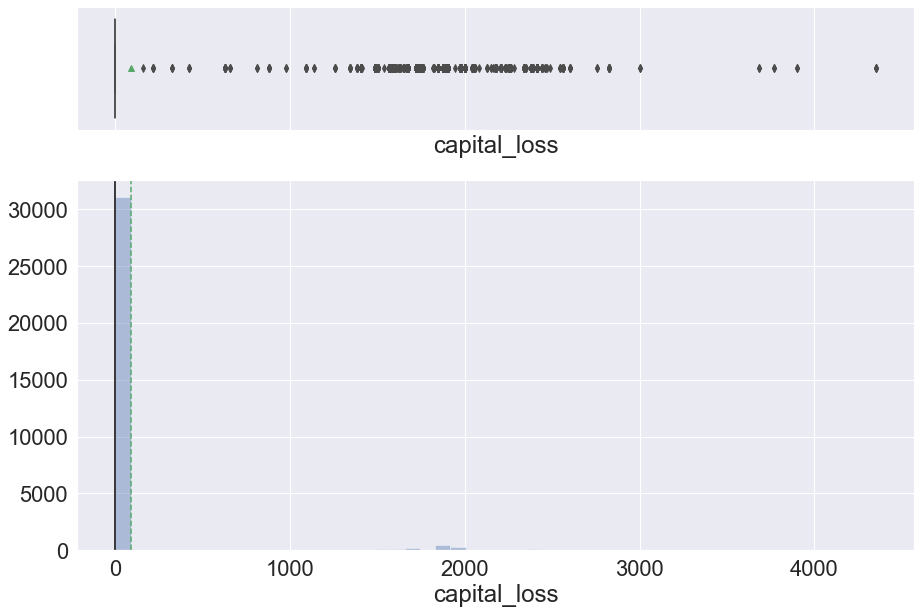

In [30]:
histogram_boxplot(data.capital_loss)

* capital_loss is continuous variable describing loss from financial investments. Histograms show that the distributions of this variables is highly skewed.
* Majority observation has 0 capital loss but it is right skewed because of some outliers

In [31]:
# Lets us look at quantile of capital loss
data.capital_loss.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99,1])

0.10       0.0
0.20       0.0
0.30       0.0
0.40       0.0
0.50       0.0
0.60       0.0
0.70       0.0
0.80       0.0
0.90       0.0
0.95       0.0
0.98    1902.0
0.99    1980.0
1.00    4356.0
Name: capital_loss, dtype: float64

### Observations on hours_per_week

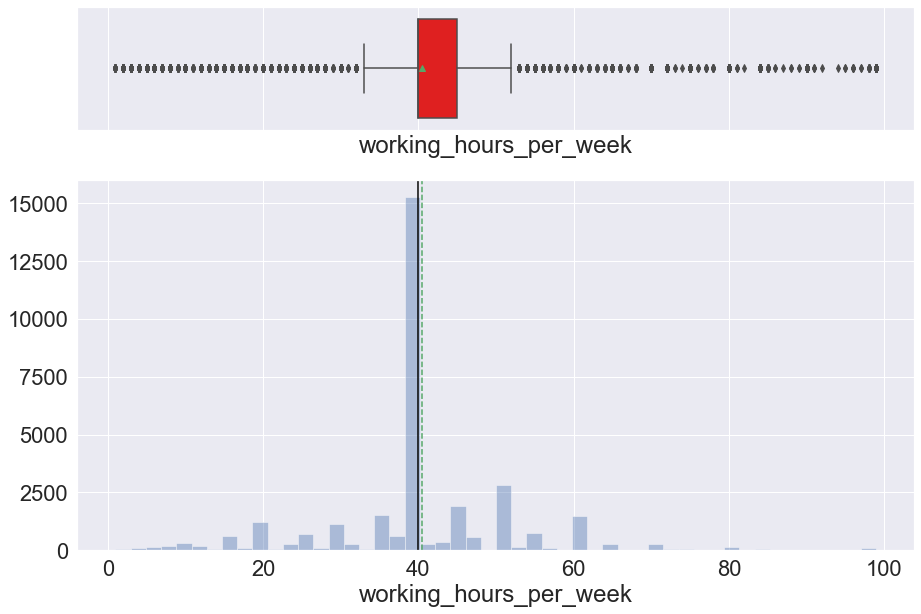

In [32]:
histogram_boxplot(data.working_hours_per_week)

* Mean working hours is around 38 hours per week
* Working hours have outliers on both sides

In [33]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

### Observations on workclass

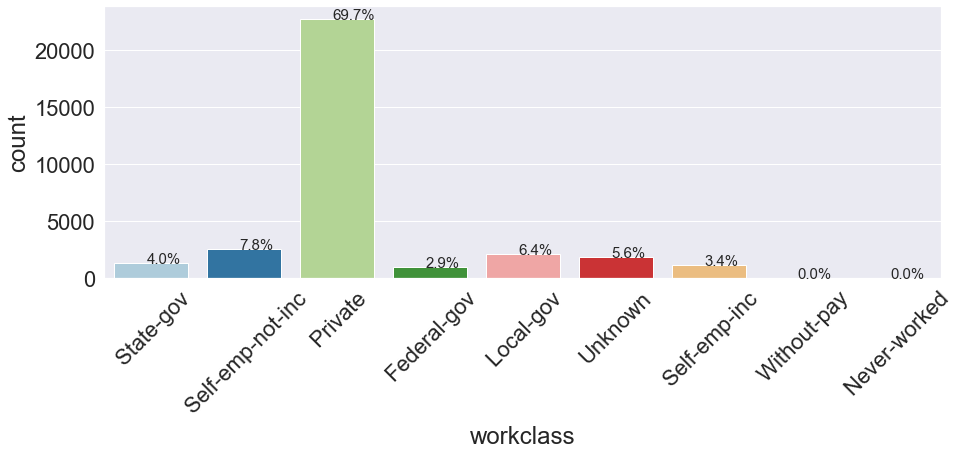

In [34]:
perc_on_bar('workclass')

* ~70% of the observations are from Private sector working class.

### Observations on marital_status

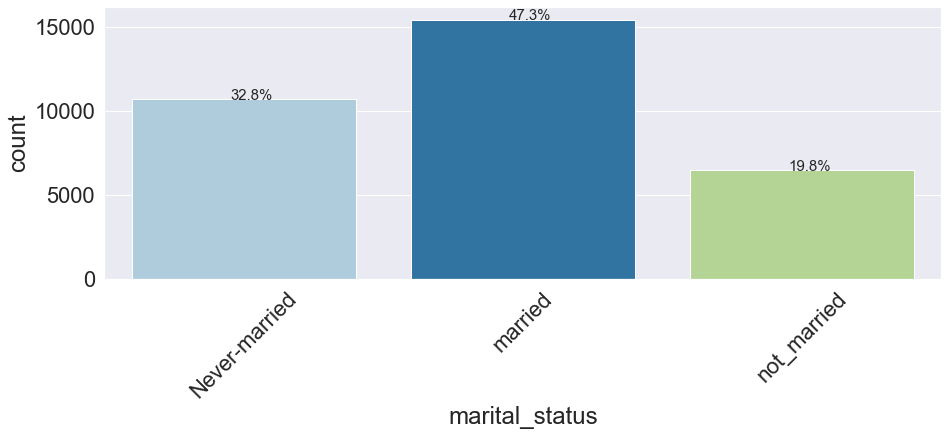

In [35]:
perc_on_bar('marital_status')

* 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.

### Observations on native_country

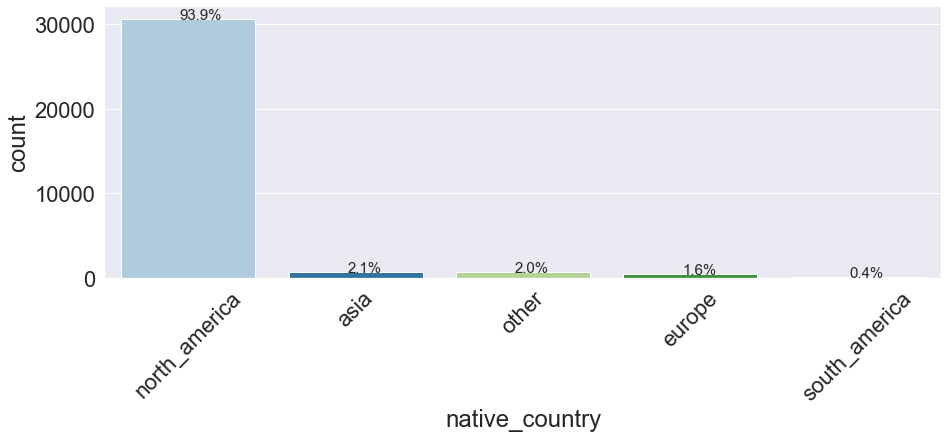

In [36]:
perc_on_bar('native_country')

* 94% of the people are native to north_america followed by 2.1% asians.

### Observations on salary

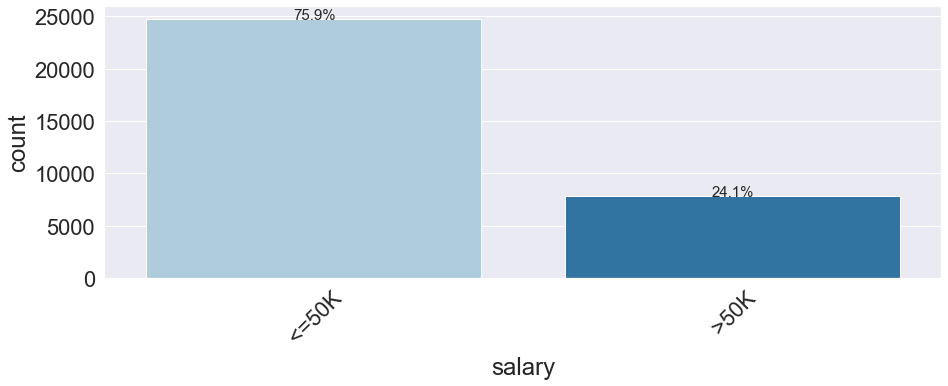

In [37]:
perc_on_bar('salary')

* 24% of the observations have salary above 50K and while 76% have salary below 50K

## Bivariate analysis

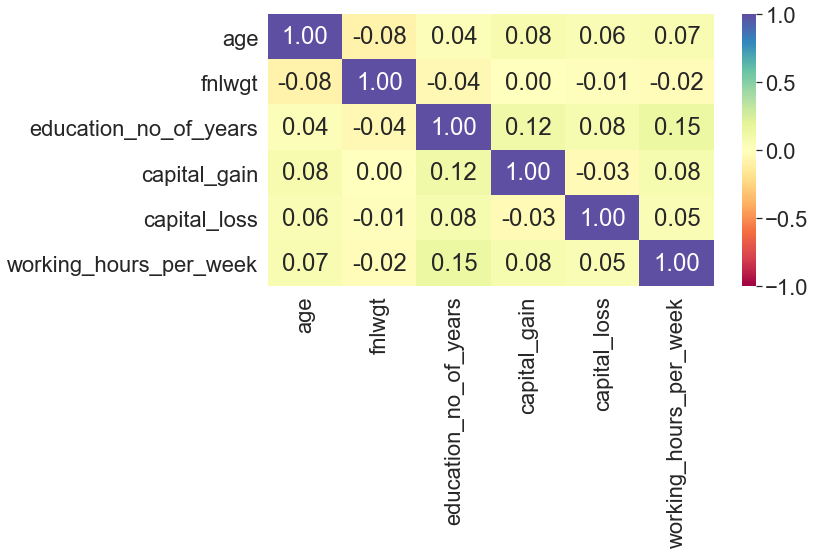

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is no significant correlation between the columns.

In [39]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['salary'],margins=True).sort_values(by=' >50K',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['salary'],normalize='index').sort_values(by=' >50K',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
------------------------------------------------------------------------------------------------------------------------


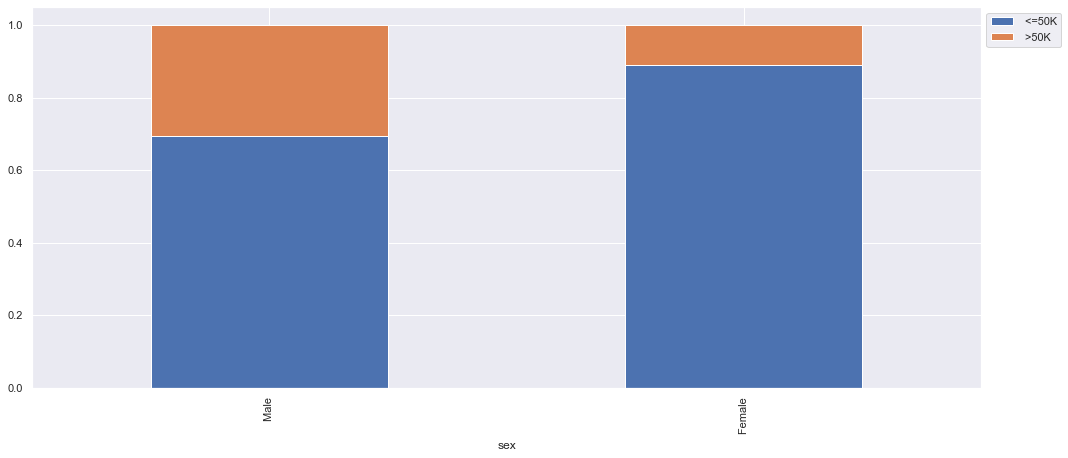

In [40]:
stacked_plot(data['sex'])

### salary vs education

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


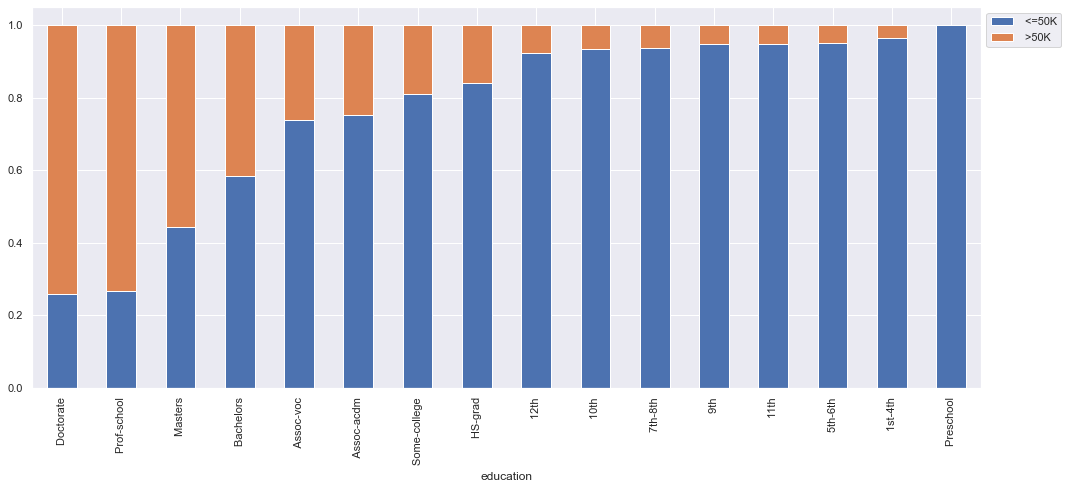

In [41]:
stacked_plot(data['education'])

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have salary above $50K.
* This clearly shows a postive relation between education and salary, higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


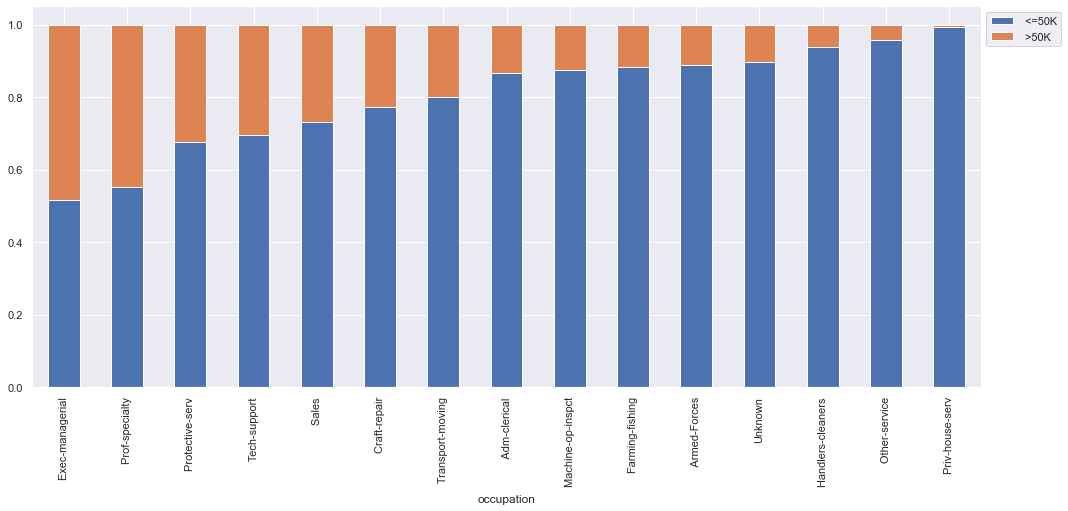

In [42]:
stacked_plot(data['occupation'])

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have salary above $50,000
- People with occupations like Private house service,handels-cleaners, farming-fishing have higher likelihood of having below 50K salary.

### salary vs race

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


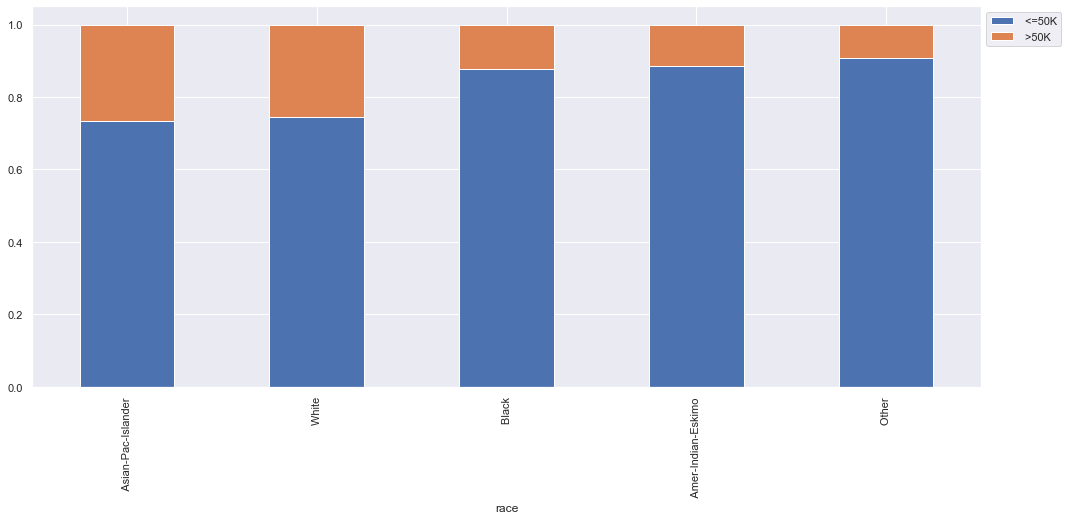

In [43]:
stacked_plot(data['race'])

* 25% of the White and Asia-Pacific people have salary more than 50K salary as compared to people from other race.

### Let us see what is the average education years for different salary group .

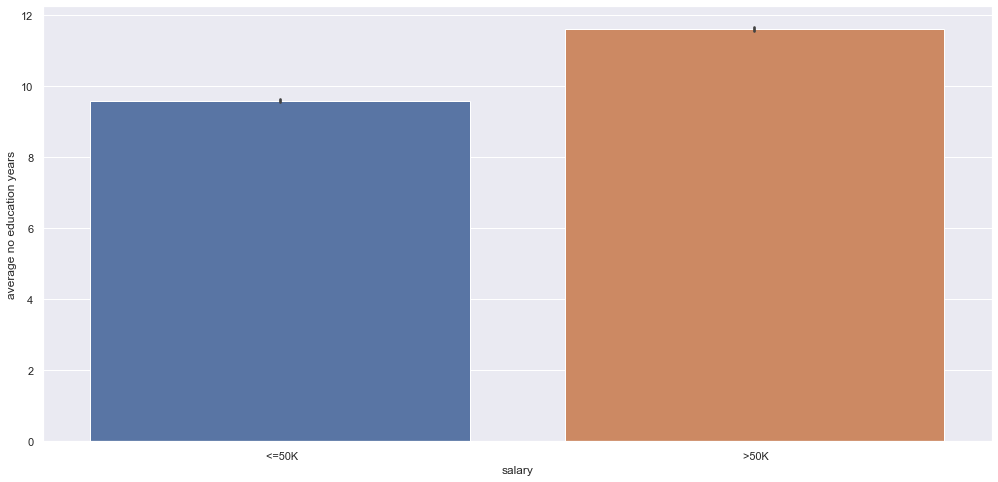

In [44]:
plt.figure(figsize=(17,8))
sns.barplot(x=data.salary,y=data.education_no_of_years)
plt.ylabel('average no education years');

* People with above 50K salary have on average 11 years of education while people with below 50K salary have on an average 9.5 years of education, indicating that people who are highly educated tend to have higher salary

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


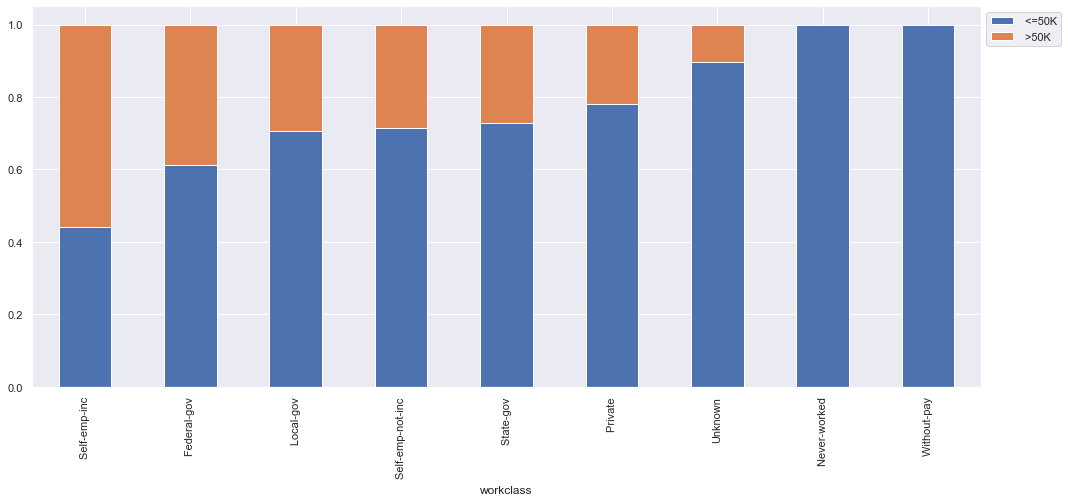

In [45]:
stacked_plot(data['workclass'])

* ~50% of the self-employed people have salary above 50K followed by ~40% of the federal govt employee who have salary more than 50K.
* ~20% of the people working in private sector earn more than 50K.

### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24720   7841  32561
married           8681   6736  15417
not_married       5847    614   6461
Never-married    10192    491  10683
------------------------------------------------------------------------------------------------------------------------


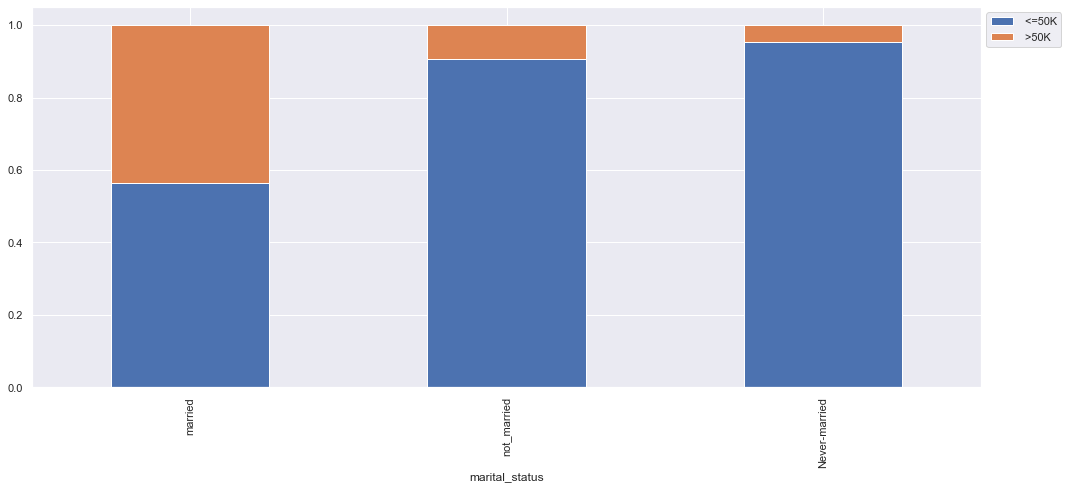

In [46]:
stacked_plot(data['marital_status'])

* Married people have higher likelihood of getting salary above 50K compared to Never Married and Not married people.

### salary vs relationship

salary            <=50K   >50K    All
relationship                         
All               24720   7841  32561
 Husband           7275   5918  13193
 Not-in-family     7449    856   8305
 Wife               823    745   1568
 Unmarried         3228    218   3446
 Own-child         5001     67   5068
 Other-relative     944     37    981
------------------------------------------------------------------------------------------------------------------------


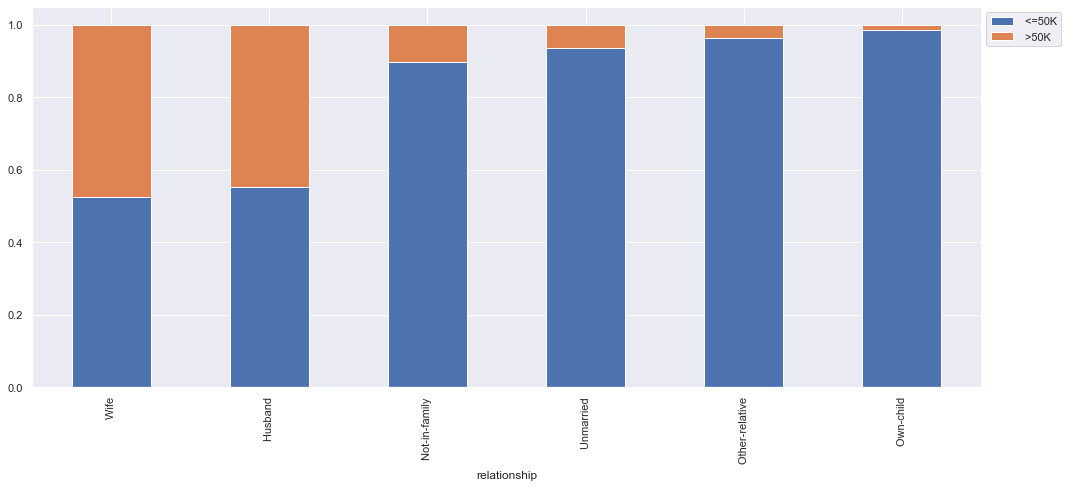

In [47]:
stacked_plot(data['relationship'])

* Husband , or Wife ( people were once married) have a higher likelihood of having salary above 50K compared to others.

salary                  <=50K   >50K    All
education_no_of_years                      
All                     24720   7841  32561
13                       3134   2221   5355
9                        8826   1675  10501
10                       5904   1387   7291
14                        764    959   1723
15                        153    423    576
11                       1021    361   1382
16                        107    306    413
12                        802    265   1067
6                         871     62    933
7                        1115     60   1175
4                         606     40    646
8                         400     33    433
5                         487     27    514
3                         317     16    333
2                         162      6    168
1                          51      0     51
------------------------------------------------------------------------------------------------------------------------


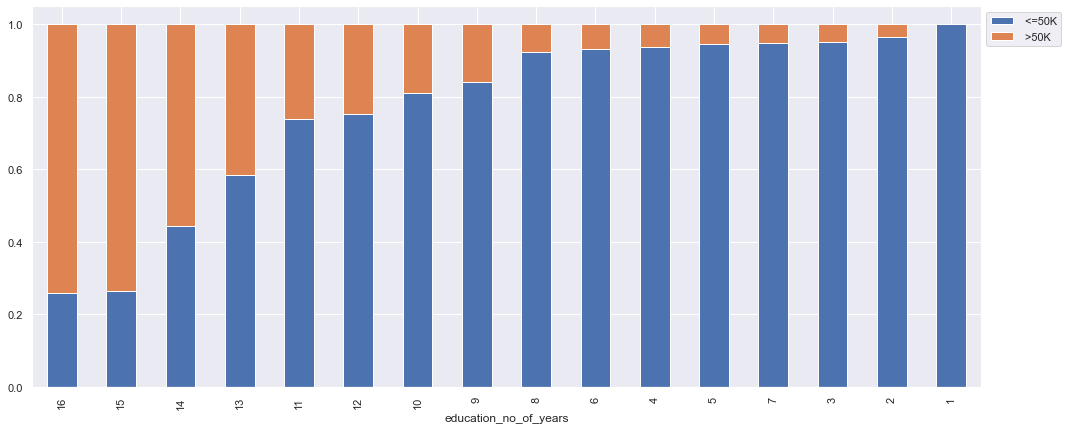

In [48]:
stacked_plot(data['education_no_of_years'])

* Majority of those people having salary above 50K have education of more than 8 years
* This clearly shows a positive relationship with salary.

**Observations**
* Self employed people have 50% chances of having  above 50K salary and federal-govt employee have 30% likelihood of having above 50K salary
* Unemployed people who have never worked or without-pay have earning less than 50K
* Married people have higher likelihood of having above  50K salary in term of relationship.
* Majority of people who have more than 50K salary work 45 hours to 75 hours
* people from asian and european countries have around 25% likelihood to have salary above 50K
* male have higher likelihood of getting above 50K salary
* married people have higher likelihood of getting above 50K salary in term of marital status while never married have least likelihood of getting above 50K salary


In [49]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='salary'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of people with <=50K salary')
    sns.distplot(data[(data[target] == ' <=50K')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of people with >50K salary")
    sns.distplot(data[(data[target] == ' >50K')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t salary')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t salary - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow') #turning off outliers from boxplot
    plt.tight_layout()
    plt.show()

### salary vs age

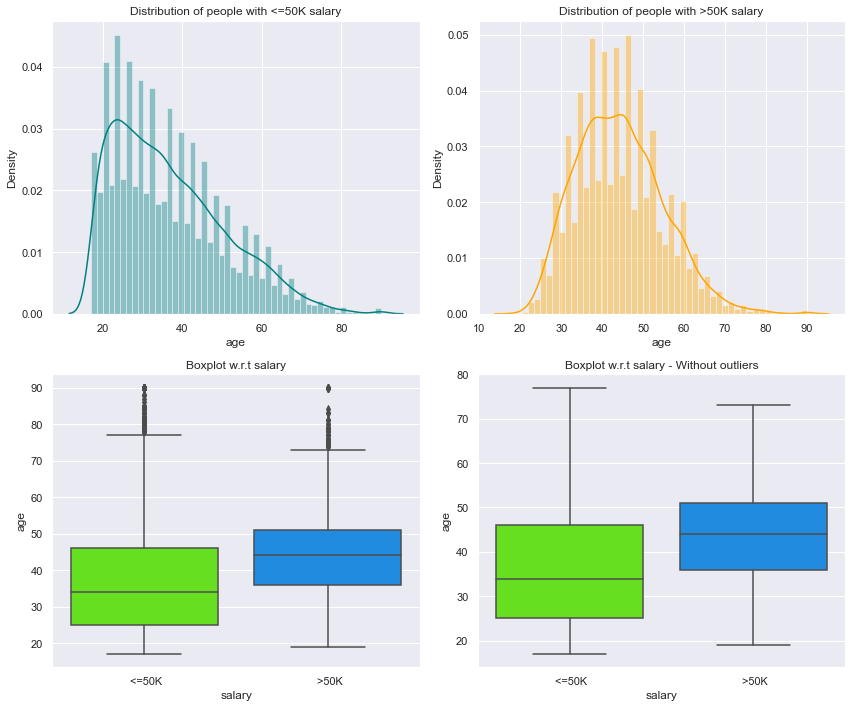

In [50]:
plot('age')

* People who more than 50K salary are generally older having average age around 48 years. Median age of people with salary >50K is greater than those with <=50K salary.
* People who have less than 50K salary have average age around 36.

### salary vs working_hours_per_week

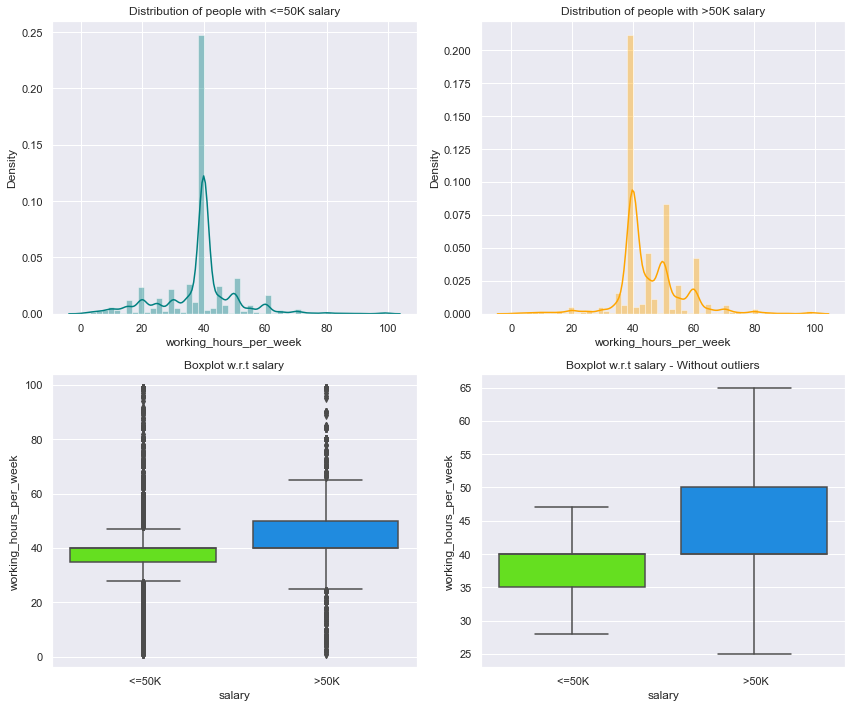

In [51]:
plot('working_hours_per_week')

* Majority of people having above 50K salary work around 38 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.
* Majority of people with above 50K salary work more hours per week than majority of people with above 50K salary.
* 75% of people with above 50K salary have more woking hours per week than 75% of people with less than 50K salary.
* 1st quantile of boxplot of above 50K group is higher than 3rd quantile of boxplot of below 50K group.

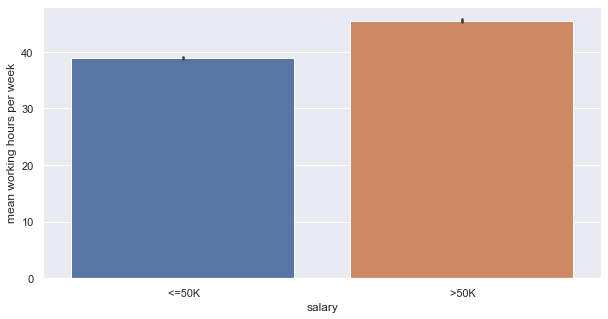

In [52]:
# let us look at mean working hours per week
plt.figure(figsize=(10,5))
sns.barplot(x='salary',y="working_hours_per_week",data=data)
plt.ylabel('mean working hours per week');

* People with above 50K salary on an average work 7 hours more weekly than people with less than 50K salary
* People with above 50k salary work on an average 45 hours per week

### Scatter plot capital gain and working hours

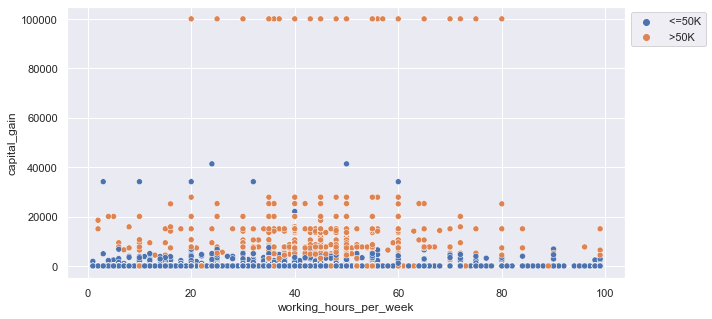

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data.working_hours_per_week,y=data.capital_gain,hue=data.salary)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

* Majority of people with above 50K salary have greater than 5000 capital gain while majority of people having below 50K salary have less than 5000 capital gain

### salary vs capital_gain

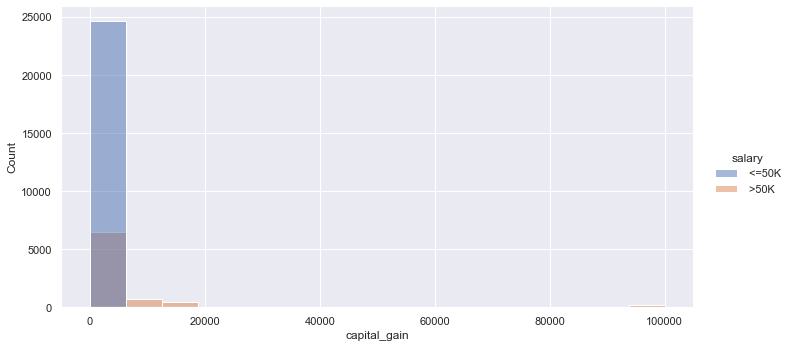

In [54]:
sns.displot(data=data, x="capital_gain", hue="salary",height=5,aspect=2);

* Majority of people above 5000 capital gain have salary greater than 50K
* Majority of people with below 50K salary have less than 2500 capital gain

### salary vs marital_status?

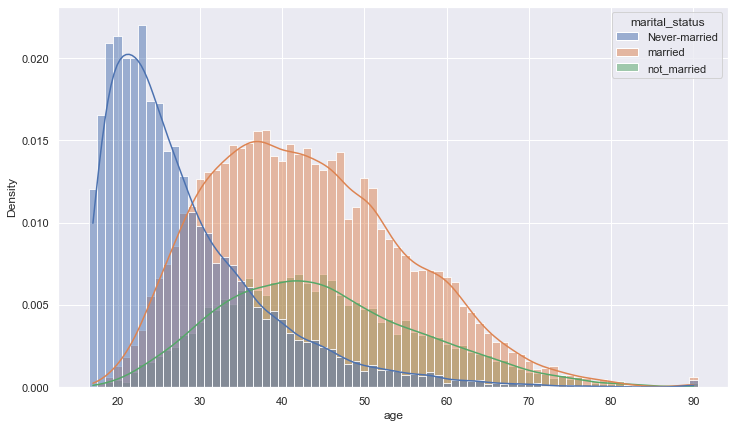

In [55]:
plt.figure(figsize=(12,7))
sns.histplot(data = data, x="age", hue="marital_status",stat='density',kde=True,discrete=True)
plt.show()

* Never - married people tend to be younger in age. They have mean around 25 years
* Not-married people who are either divorced, or separated or widowed are slight older than married people

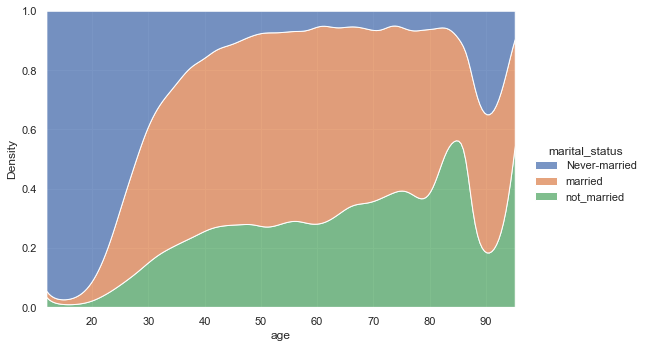

In [56]:
# lets us look at normalized chart of age vs marital status
sns.displot(data=data,x="age", hue="marital_status",kind="kde",multiple='fill',height=5,aspect=1.5);

* Majority of Never-married people are young and are around 25 years old
* As the age increases people marry and therefore  (Never-married people) proportion decreases which agrees with our understanding

### Let's look the number of hours people spend working based on their occupation

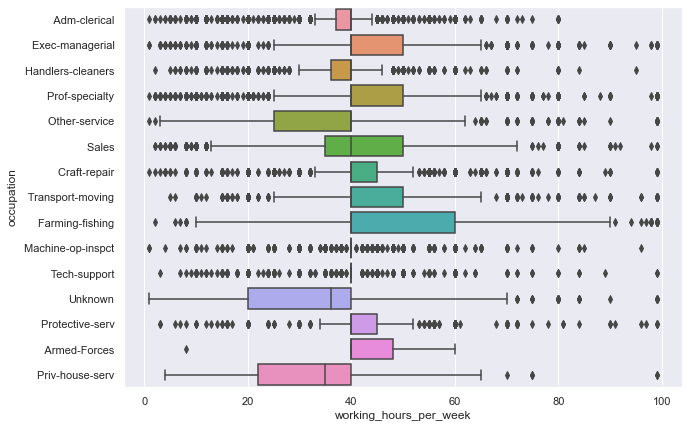

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(y="occupation", x="working_hours_per_week", data=data);

* There is high variation in working hours per week for different occupation,  more than 75% of people with occupations as farming-fishing, executive manager and Prof-speciality, put in more than 40 hours per week.

### Data Pre-Processing

#### Lets look at outliers in every numerical column

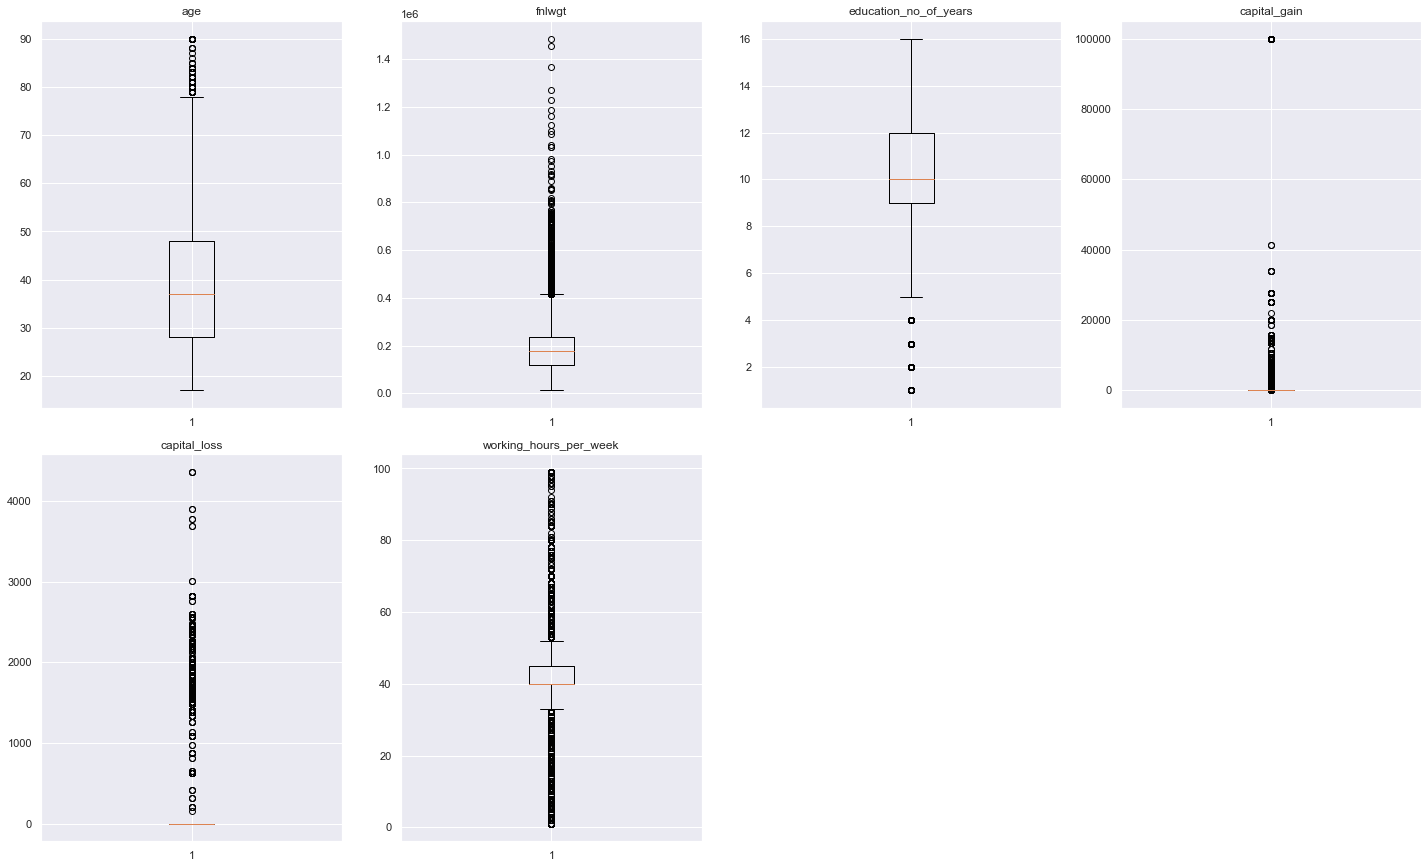

In [58]:
# outlier detection using boxplot
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Age,fnlwgt , capital gain and capital loss have upper outliers 
* education_no_years has lower outliers 
* working_hours_per_week has both upper and lower outliers

### Treating Outliers

In [59]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [60]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

  
# items to be removed 
unwanted= {'capital_gain', 'capital_loss'} # these column have very few non zero observation , doing outlier treatment would remove those observation so we are keeping it as it is
  
numerical_col = [ele for ele in numerical_col if ele not in unwanted] 
data = treat_outliers_all(data,numerical_col)

* Converting the data type of categorical features to 'category'

### Data Preparation

In [61]:
## converting object type columns to category
data[cat_columns] = data[cat_columns].astype('category')

data['salary'] = data['salary'].apply(lambda x: 1 if x==' <=50K' else 0)

X = data.drop(['salary'], axis=1)
Y = data['salary']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has salary >50K but actually the salary is <=50K.
2. Predicting a person doesn't has a salary >50K but actually the salary is >50k.

### Which case is more important? 
* Both the cases are important as:
a) If we predict a person has salary >50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme.
b) If we predict a person doesn't have a salary >50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme.

### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, greater the f1_score higher the chances of identifying both the classes correctly.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [62]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [63]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - >50K","Actual - <=50K"]],
                  columns = [i for i in ['Predicted - >50K','Predicted - <=50k']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [64]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [65]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                             0.000000
age                               1.645905
fnlwgt                            1.039156
education_no_of_years                  inf
capital_gain                      1.060716
capital_loss                      1.022315
working_hours_per_week            1.265603
workclass_ Local-gov              3.114787
workclass_ Never-worked                inf
workclass_ Private                7.834584
workclass_ Self-emp-inc           2.201381
workclass_ Self-emp-not-inc       3.594753
workclass_ State-gov              2.312729
workclass_ Without-pay            1.019309
workclass_Unknown                      inf
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-vo

* There is inf (infinity) is several dummy columns which indicated perfect collinearity. We will drop those variables.

In [66]:
# droping variables of perfect collinearity
variables_with_prefect_collinearity = vif_series1[vif_series1.values==np.inf].index.tolist()
num_feature_set = num_feature_set.drop(variables_with_prefect_collinearity,axis=1)

In [67]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                            348.582092
age                                1.599431
fnlwgt                             1.034115
capital_gain                       1.035570
capital_loss                       1.017772
working_hours_per_week             1.245967
workclass_ Local-gov               1.963436
workclass_ Private                 3.725709
workclass_ Self-emp-inc            1.587372
workclass_ Self-emp-not-inc        2.251466
workclass_ State-gov               1.557754
workclass_ Without-pay             1.010012
marital_status_married            13.827648
marital_status_not_married         1.918993
occupation_ Armed-Forces           1.004785
occupation_ Craft-repair           2.035554
occupation_ Exec-managerial        1.899167
occupation_ Farming-fishing        1.355177
occupation_ Handlers-cleaners      1.371692
occupation_ Machine-op-inspct      1.487139
occupation_ Other-service          1.671549
occupation_ Priv-house-serv        1.0413

**We observe that marital_status_married ,relationship_ Not-in-family,race_ Black and race_ White  exhibit high multicollinearity.**

Note: All the above mentioned variables that exhibit multicollinearity are dummy variables and we can't drop them, because only one class of a variable is multicollinear and others are not, this signifies that the variable as a whole is not multicollinear. So we will proceed with all of these variables.

* Now that there's no multicollinearity in the data, let's build a logistic model, check it's performance and use the output to interpret the results.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

In [69]:
y_test.value_counts()

1    7550
0    2219
Name: salary, dtype: int64

Accuracy on training set :  0.7921200421200422
Accuracy on test set :  0.8050977582147609
Recall on training set :  0.9567268491555038
Recall on test set :  0.957748344370861
Precision on training set :  0.8043776319655274
Precision on test set :  0.8202132486388385
F1 on training set :  0.8739625452223878
F1 on test set :  0.88366124893071


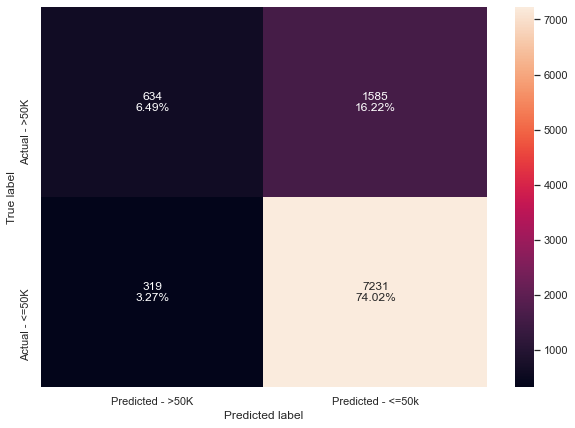

In [70]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

* ROC-AUC on training set

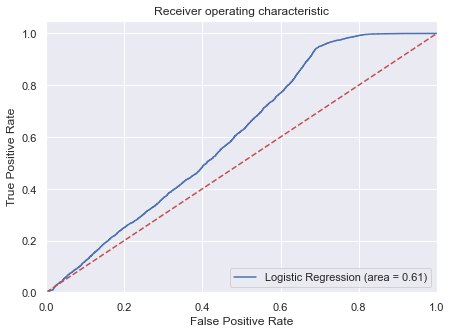

In [71]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

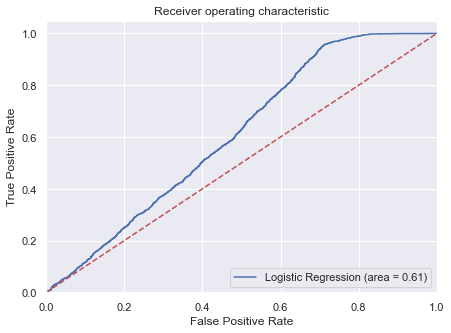

In [72]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Finding the coefficients

In [73]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,const,age,fnlwgt,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
coef,0.001111,-0.0032,0.000004,-0.000427,-0.000925,0.020561,-0.000044,0.001226,-0.000301,0.000011,-0.000012,0.000004,-0.0027,0.001188,8.201082e-07,0.00013,-0.00085,0.000164,0.000285,0.000278,0.000805,0.00004,-0.000643,-0.000056,0.000039,-0.000034,0.000095,0.001515,0.000227,0.001445,0.000733,-0.000336,0.000031,0.000427,0.000047,0.00054,-0.000773,-0.000023,0.001088,0.000036,0.000024


### Coefficient interpretations

* Coefficient of capital_loss, workclass_Never-worked,education_Prof-school,education_Bachelors,marital_status_married, etc are positive, increase in these will lead to increase in chances of taking a personal loan 
* Coefficient of capital_loss, workclass_Never-worked,education_Prof-school,education_Bachelors,marital_status_married, etc are negative, increase in these will lead to decrease in chances of person having <=50K salary.

###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [74]:
change_odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(change_odds, X_train.columns, columns=['odds']).T

,const,age,fnlwgt,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
odds,0.111119,0.320472,0.000353,0.042664,0.092563,2.077404,0.004394,0.122695,0.030081,0.001127,0.001163,0.000383,0.270411,0.118912,0.000082,0.013035,0.08508,0.016444,0.028549,0.027827,0.08055,0.004049,0.064276,0.005595,0.003874,0.003373,0.009454,0.151628,0.022733,0.144594,0.073277,0.033558,0.003144,0.042729,0.004736,0.054024,0.07733,0.00226,0.108883,0.003602,0.002398


### Coefficient interpretations

* Age: 1 unit change in Age will change the odds of a person having salary <=50k by 0.32%
* capital_gain: 1 unit change in the capital_gain will change the odds of a person having salary <=50k by 0.042%
* capital_loss: 1 unit change in the capital_loss will change the odds of a person having salary <=50k by 0.092%
* working_hours_per_week: 1 unit change in the working_hours_per_week will change the odds of a person having salary <=50k by 2.07%.
* The odds of a male having salary <=50K is 0.07% less than a female.
* The odds of a person whose marital status is married having a salary <=50K is 0.27% less than the customer who was never married.Similarly,The odds of a person whose marital status is not_married having a salary <=50K is 0.11% more than the customer who was never married. [keeping Never_married category as a reference].

`Interpretation for other attributes can be made similarly.`

### Model Performance Improvement

* Let's see if the f1 score score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [75]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.5103343014826703


In [76]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.7913302913302913
Accuracy on test data: 0.8045859351008292
Recall on train data: 0.9549796156086197
Recall on test data: 0.9562913907284768
Precision on train data: 0.8045632973503435
Precision on test data: 0.8205477895215365
F1 Score on train data: 0.8733422103861517
F1 Score on test data: 0.8832344485901277
ROC-AUC Score on train data: 0.6232564388964479
ROC-AUC Score on test data: 0.6223547985638779


* There are no changes in the model performance as the optimal threshold is 0.51 in contrast to a default threshold of 0.50.

#### Let's use Precision-Recall curve and see if we can find a better threshold

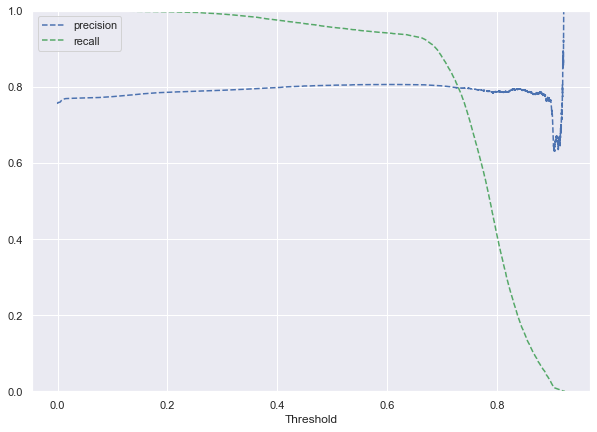

In [77]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.7 threshold we get a higher recall and a good precision.

In [79]:
optimal_threshold = 0.7

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.7462267462267462
Accuracy on test data: 0.7597502303204012
Recall on train data: 0.8793244030285381
Recall on test data: 0.8847682119205298
Precision on train data: 0.8026581605528974
Precision on test data: 0.8189285276449675
F1 Score on train data: 0.8392440244580323
F1 Score on test data: 0.85057617622716
ROC-AUC Score on train data: 0.6095305757583103
ROC-AUC Score on test data: 0.609576534982347


* Model is performing well on training and test set.
* Recall has reduced by changing the optimal threshold to 0.7 which in turn has reduced the F1 score.

# Selecting subset of important features using Sequential Feature Selector method

*Why we should do feature selection*

- Reduces dimensionality
- Discards uninformative features
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalisation)
- Speeds training/testing

### How sequential feature selector works?
### It starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [81]:
## Defining X and Y variables
X = data.drop(['salary'], axis=1)
Y = data['salary']

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [82]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [83]:
X_train.shape

(22792, 59)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    8.5s finished

[2021-04-15 14:43:00] Features: 1/59 -- score: 0.8779650693205454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   13.0s finished

[2021-04-15 14:43:13] Features: 2/59 -- score: 0.8833095157734189[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   14.8s finished

[2021-04-15 14:43:28] Features: 3/59 -- score: 0.8860838153908094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  56 out o

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   51.8s finished

[2021-04-15 15:04:52] Features: 33/59 -- score: 0.9022377300708749[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  1.1min finished

[2021-04-15 15:06:01] Features: 34/59 -- score: 0.9024450280870431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  1.1min remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished

[2021-04-15 15:07:12] Features: 35/59 -- score: 0.90255340575676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.1min remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished

[2021-04-15 15:08:21] Features: 36/59 -- score: 0.9025212031377204[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 conc

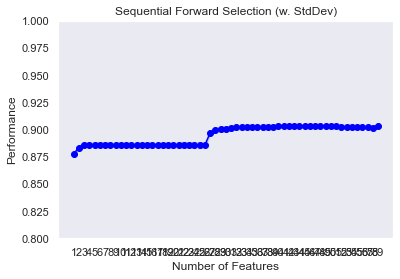

In [85]:
# we will first build model with all varaible
sfs = SFS(m, k_features=59, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

* We can see that performance started decreasing after addition of 9th feature, but increased again after addition 29th feature. One of the reason for this can be the interaction of variables.
* The decision to choose the k_features now depends on the f1 score vs the complexity of the model - with 9 features we are getting 0.88 f1 score and with 29 features we will get 0.90 f1 score.
* The increase in f1 score is not much significant as we are getting the same values with a less complex model.
* So we'll use 9 features only to build our model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    6.2s finished

[2021-04-15 15:38:00] Features: 1/9 -- score: 0.8779650693205454[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    8.6s finished

[2021-04-15 15:38:09] Features: 2/9 -- score: 0.8833095157734189[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   10.8s finished

[2021-04-15 15:38:20] Features: 3/9 -- score: 0.8860838153908094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  56 out of  

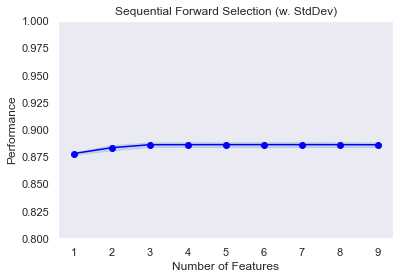

In [86]:
sfs1 = SFS(m, k_features=9, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

### Now Which features are important?

In [87]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[3, 4, 7, 12, 27, 31, 38, 50, 58]


* Let's look at best 9 variables

In [88]:
X_train.columns[feat_cols]

Index(['capital_gain', 'capital_loss', 'workclass_ Never-worked',
       'workclass_ Without-pay', 'education_ Prof-school',
       'occupation_ Armed-Forces', 'occupation_ Priv-house-serv',
       'race_ Asian-Pac-Islander', 'native_country_south_america'],
      dtype='object')

In [89]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [90]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

Accuracy on training set :  0.8131800631800632
Accuracy on test set :  0.8226021087112294
Recall on training set :  0.972743156668608
Recall on test set :  0.9721854304635762
Precision on training set :  0.815049775522155
Precision on test set :  0.828162021888751
F1 on training set :  0.8869417449949552
F1 on test set :  0.8944129653323586


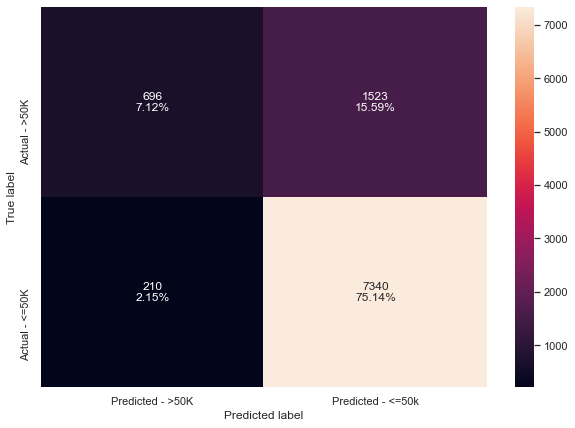

In [91]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(logreg,X_test_final,y_test)

* Model is giving a generalized performance on training and test set.
* With less number of features the model performance is comparable to the initial logistic regression model.

In [96]:
comparison_frame = pd.DataFrame({'Model':['Initial Logistic Regression Model with sklearn', 
                                          'Logistic Regression - Optimal threshold = 0 .7',
                                          'Logistic Regression - with sequential feature selector - 9 variables'], 
                                 'Train_Accuracy':[0.792,0.746,0.813], 
                                 'Test_Accuracy':[0.805,0.759, 0.822],
                                 'Train Recall':[0.956,0.879,0.972],
                                 'Test Recall':[0.957,0.884,0.972], 
                                 'Train Precision':[0.804,0.802,0.815],
                                 'Test Precision':[0.820,0.818,0.828],
                                 'Train F1':[0.873,0.839,0.886],
                                 'Test F1':[0.883,0.850,0.894]
                                 
                                }) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Initial Logistic Regression Model with sklearn,0.792,0.805,0.956,0.957,0.804,0.820,0.873,0.883
1,Logistic Regression - Optimal threshold = 0 .7,0.746,0.759,0.879,0.884,0.802,0.818,0.839,0.850
2,Logistic Regression - with sequential feature ...,0.813,0.822,0.972,0.972,0.815,0.828,0.886,0.894


#### Recommendations
- The government should promote education among citizens, they should make policies for better higher education like a professional degree course or doctorate for citizens because as we say in our analysis that people who are doctorate or prof-school in education are more likely to have a salary above 50,000 Dollars.
- Working hours is one of the significant predictor of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for increase in salaries. This would improve work life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes so that people can plan and invest into resources.
- Reforms should be made for private sector employees so that they are paid fairly for their work.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that salary criterion of employees is independent of their race.